In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run Data_manipulation.ipynb

In [2]:
# Using EWMA

def detect_anomalies_ewma(df, lambda_, threshold):
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values

    # Initialize EWMA
    ewma = np.zeros_like(data)
    ewma[0] = data[0]

    # Compute EWMA
    for t in range(1, len(data)):
        ewma[t] = lambda_ * data[t] + (1 - lambda_) * ewma[t-1]

    # Calculate standard deviation of the residuals (differences)
    residuals = data - ewma
    std_dev = np.std(residuals)

    # Detect anomalies
    anomalies = df[np.abs(residuals) > threshold * std_dev]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, ewma, label='EWMA', color='orange')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using EWMA')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies

# Example usage
# df = pd.read_csv('your_data.csv', parse_dates=True, index_col='Date')
# anomalies = detect_anomalies_ewma(df)
# print(anomalies)


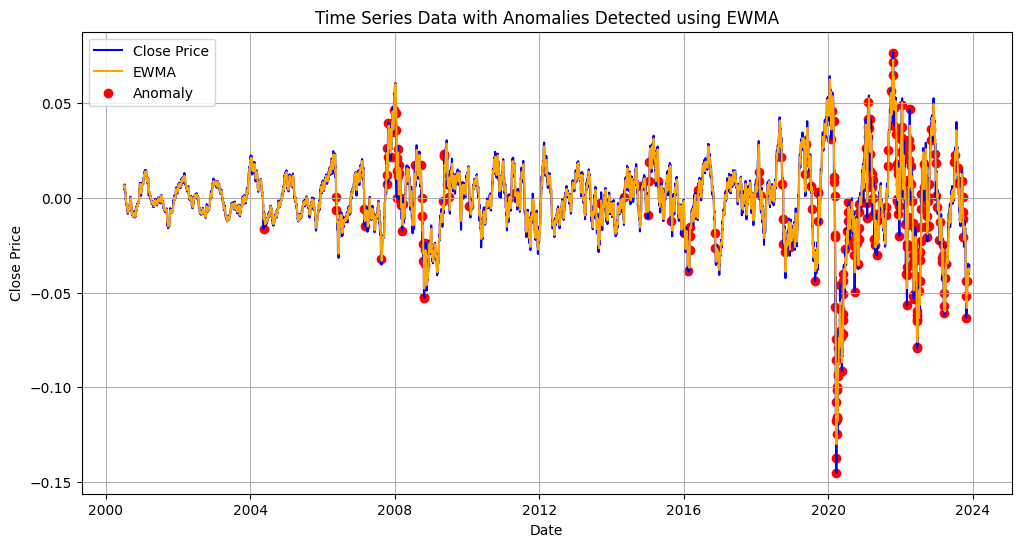

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2004-05-17,-0.016320,-0.008384,-0.008758,-0.019808,0.003232
2006-05-19,0.000577,0.007118,0.009843,0.000037,0.036996
2006-05-22,-0.006337,0.000964,0.002491,-0.013219,0.026468
2007-02-28,-0.006068,0.000767,-0.001015,-0.007637,0.028815
2007-03-05,-0.015075,-0.008607,-0.010002,-0.014576,0.023027
...,...,...,...,...,...
2023-09-28,-0.020685,-0.010620,-0.013381,-0.018868,0.044245
2023-10-23,-0.043905,-0.033699,-0.035408,-0.041232,-0.070562
2023-10-25,-0.051592,-0.044197,-0.044760,-0.049819,-0.051726


In [3]:
# Detecting anomaly
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_ewma(df_residuals,0.5 , 2)

# Display anomalies (dates)
print("Anomalies:")
anomalies

In [4]:
import matplotlib.pyplot as plt

def plot_with_anomalies(df, anomalies_df, interval):
    # Assuming 'Date' is in datetime format and set as index for the nifty_df dataframe
    #anomalies_df['Date'] = pd.to_datetime(anomalies_df['Date'])
    #anomalies_df.set_index('Date', inplace=True)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

    # Define the start and end years
    start_year = 2000
    end_year = 2025

    # Loop through each 2-year segment and plot the data
    for year in range(start_year, end_year, interval):
        start_date = f"{year}-01-01"
        end_date = f"{year + interval - 1}-12-31"
        
        # Slice the data for the current year segment
        segment = df[start_date:end_date]
        anomalies_in_segment = anomalies_df[start_date:end_date]

        # Plot the current segment
        plt.figure(figsize=(12, 6))
        plt.plot(segment.index, segment['Close'], label="Close Price", color='blue')
        
        # Mark anomalies
        plt.scatter(anomalies_in_segment.index, segment.loc[anomalies_in_segment.index]['Close'], color='red', label='Anomaly')
        
        # Plot settings
        plt.title(f'Data with Anomalies ({year}-{year + interval - 1})')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()


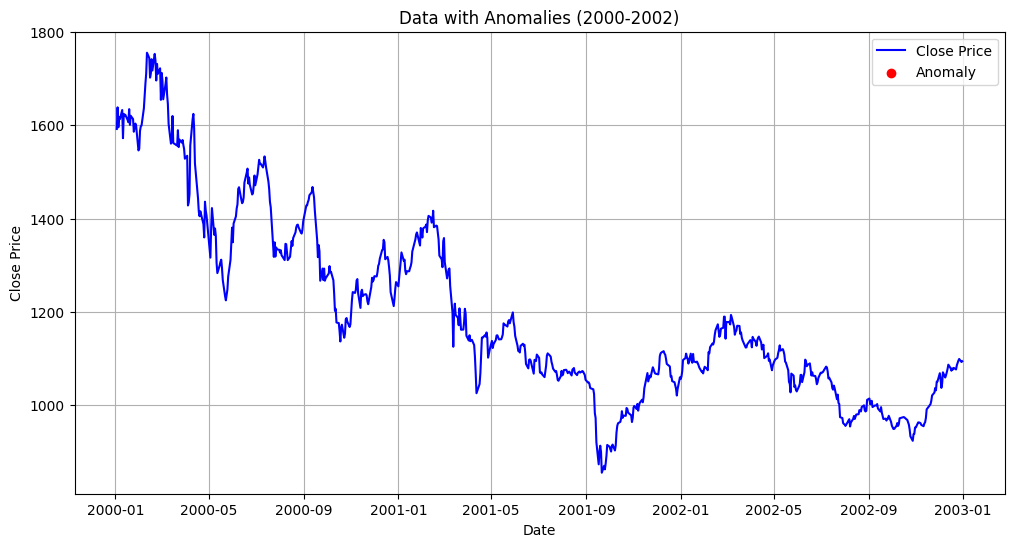

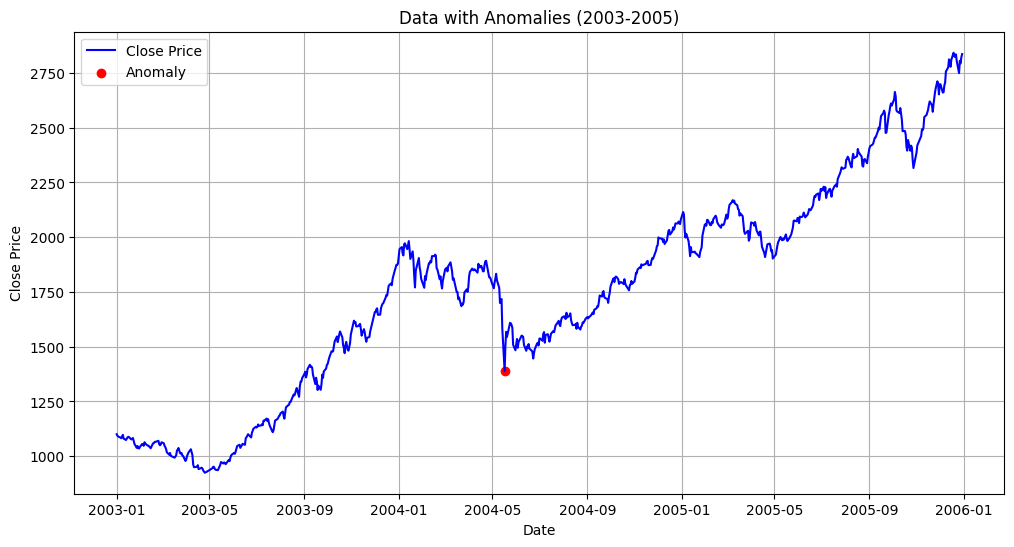

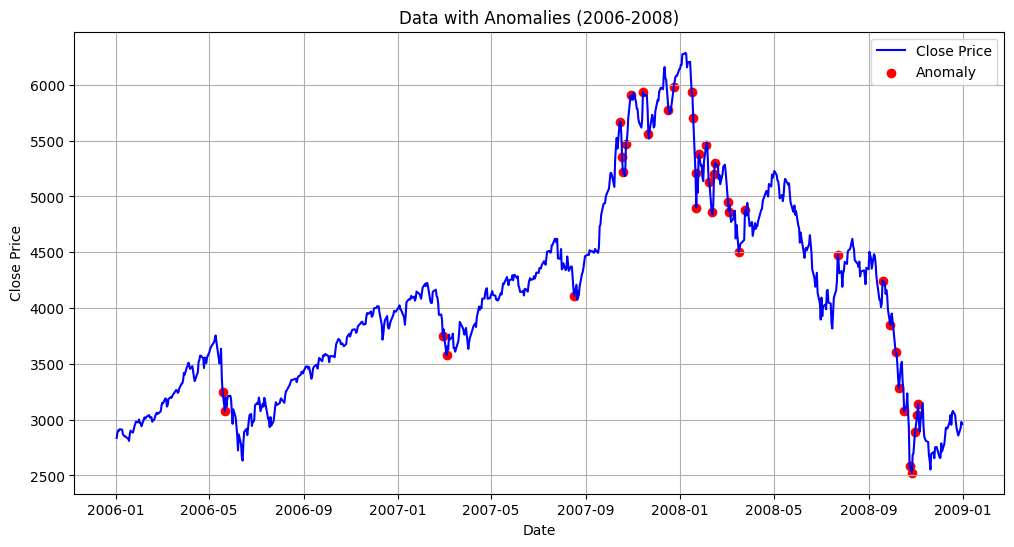

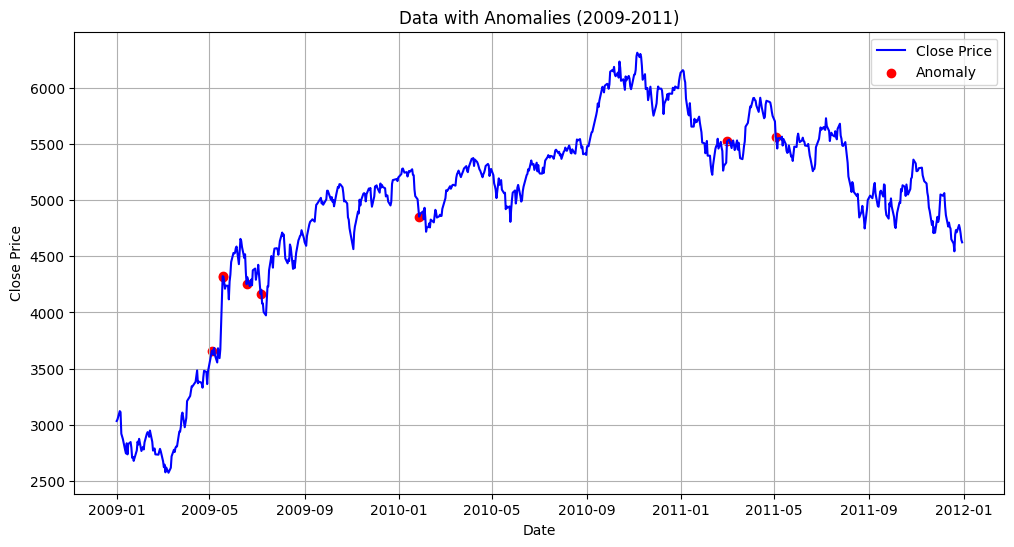

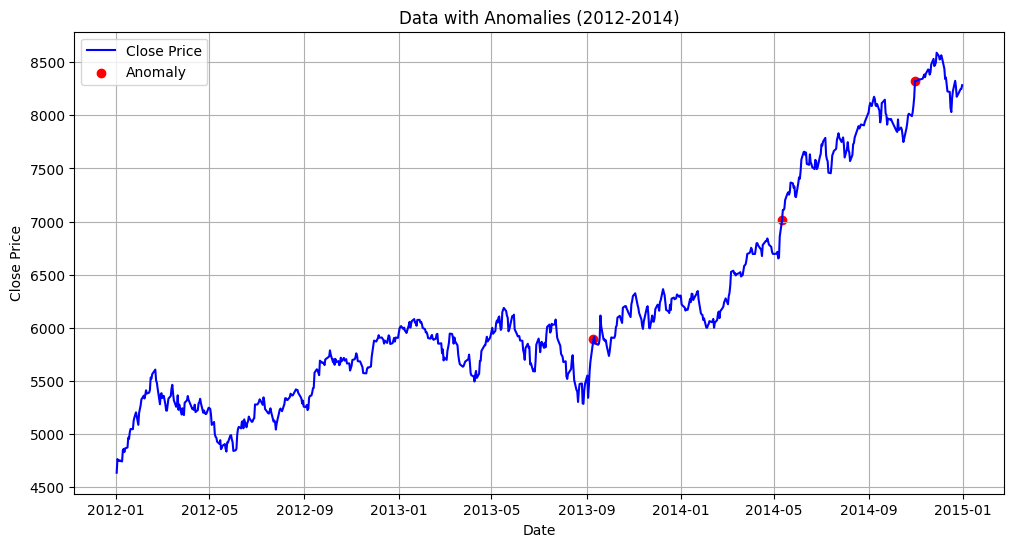

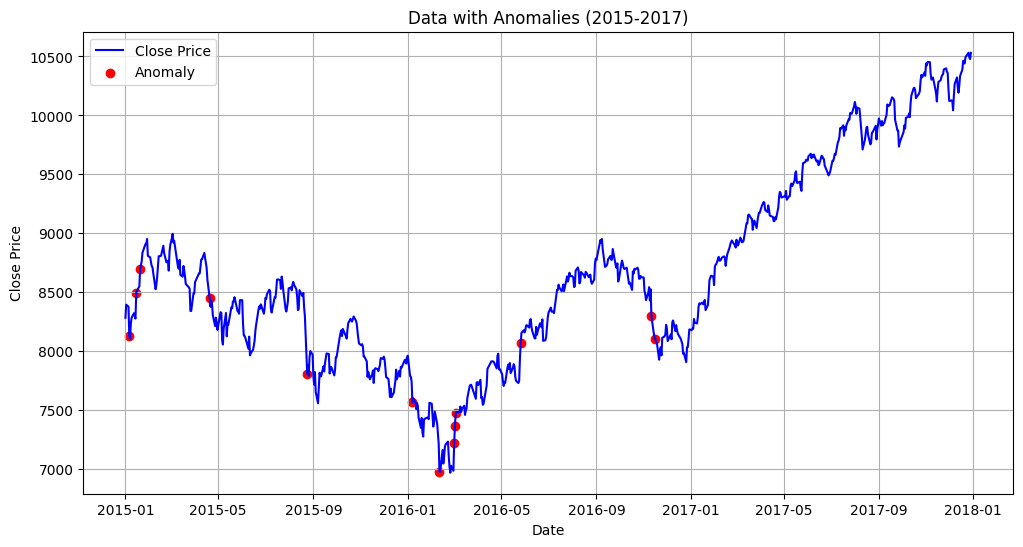

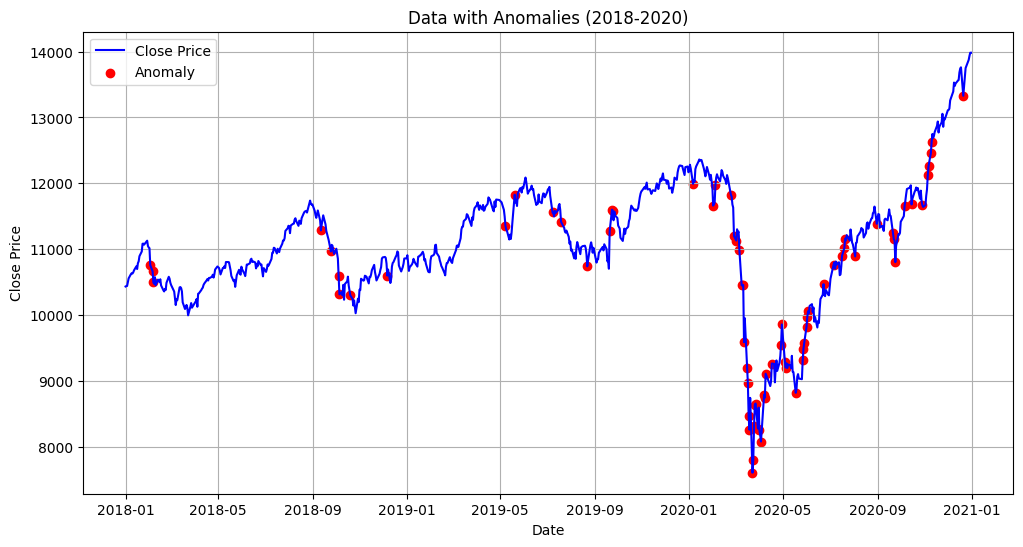

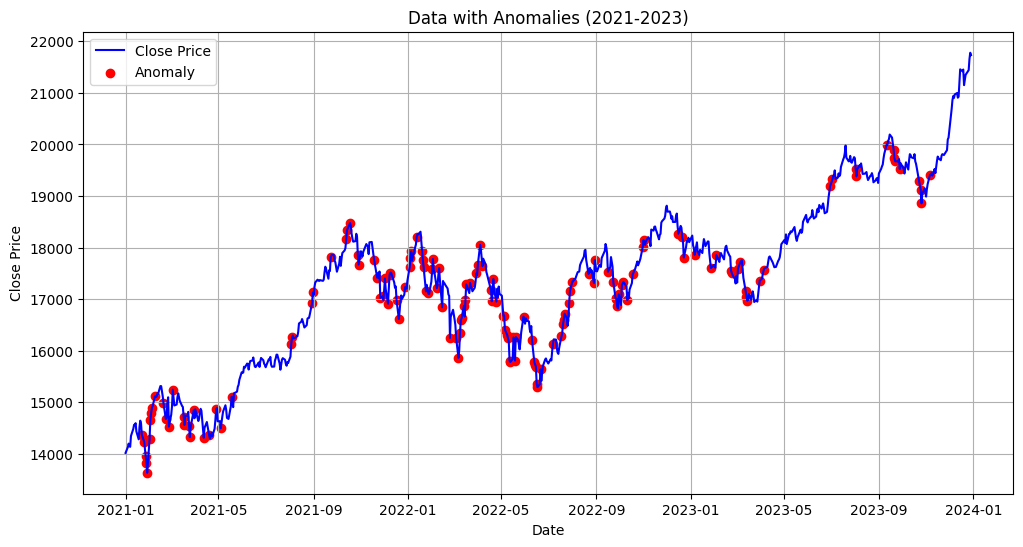

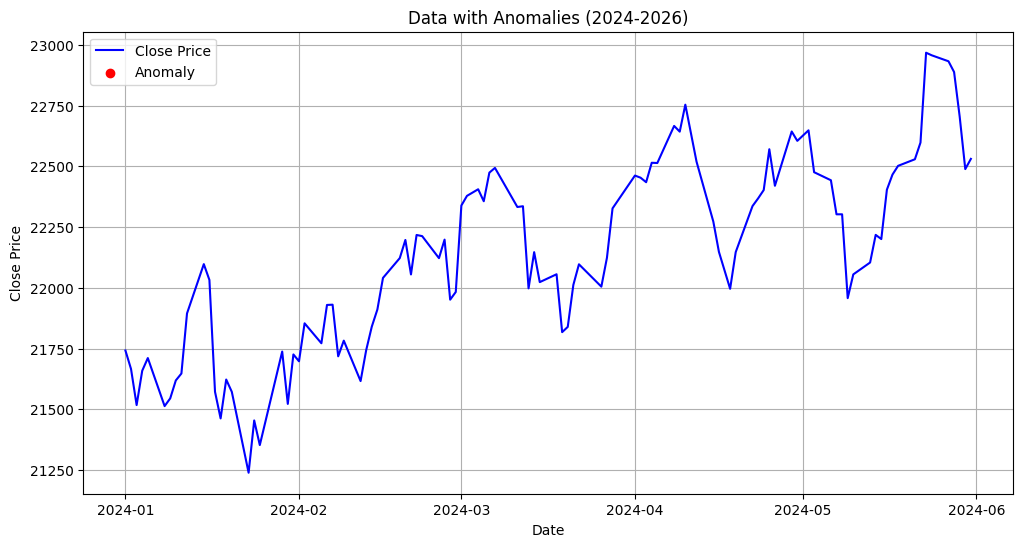

In [5]:
NIFTY_3 = plot_with_anomalies(NIFTY, anomalies, interval=3)

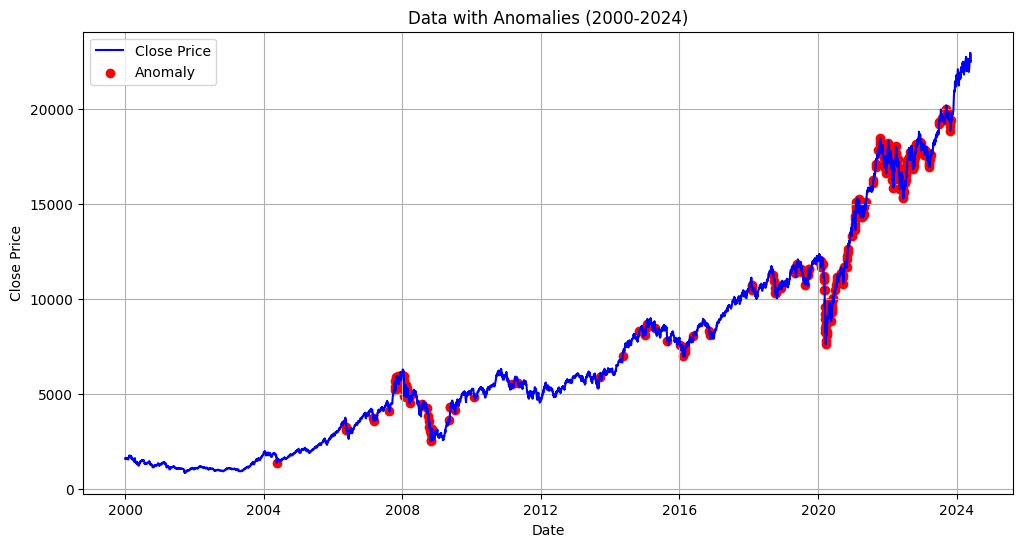

In [6]:
NIFTY_all = plot_with_anomalies(NIFTY, anomalies, 25)

# IBOVESPA

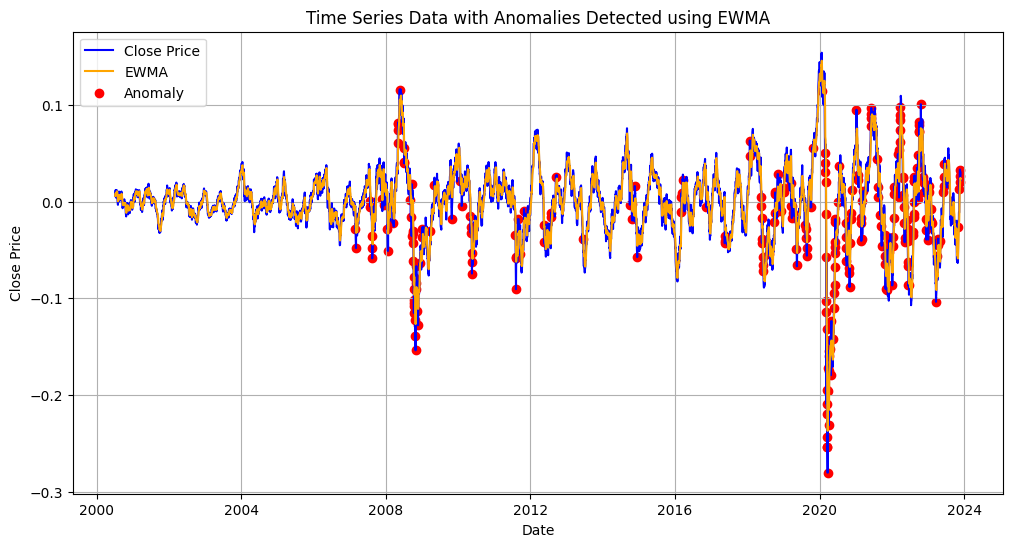

Anomalies:


,Open,High,Low,Close,Volume (in Million)
Date,,,,,
2007-02-27,-0.004675,-0.008266,-0.028015,-0.027814,0.368767
2007-03-05,-0.037710,-0.041483,-0.044141,-0.047980,0.096902
2007-07-26,0.016002,0.012015,-0.004807,0.001189,0.065460
2007-07-27,0.000785,0.000072,-0.000489,-0.005121,-0.002518
2007-08-14,-0.021542,-0.025183,-0.029904,-0.036005,-0.018236
...,...,...,...,...,...
2023-11-03,-0.046339,-0.029162,-0.042106,-0.026386,0.036217
2023-11-14,-0.011405,0.005777,-0.004400,0.013527,0.021134
2023-11-16,0.012227,0.016560,0.016801,0.020312,0.021236


In [7]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_ewma(df_residuals, 0.3, 2)

# Display anomalies (dates)
print("Anomalies:")
anomalies

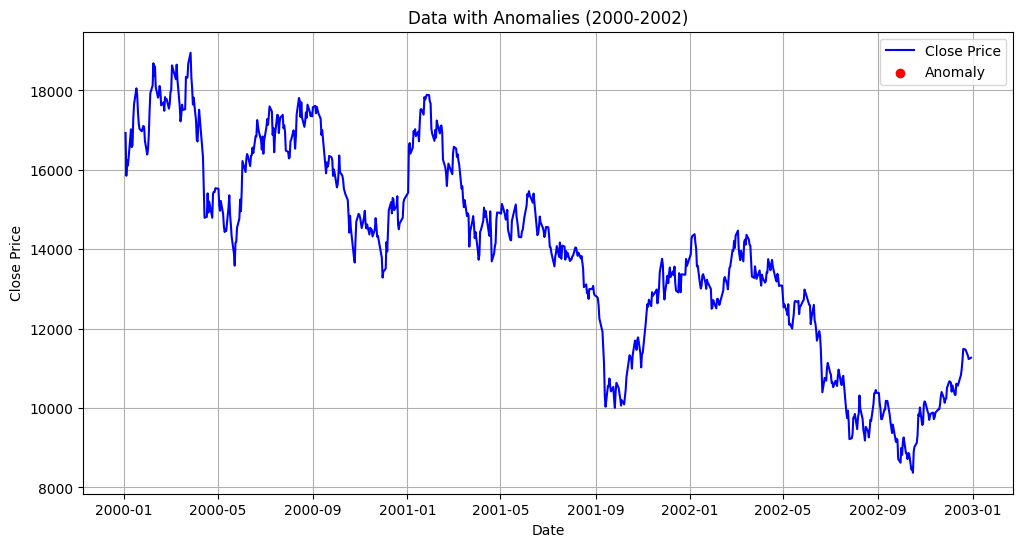

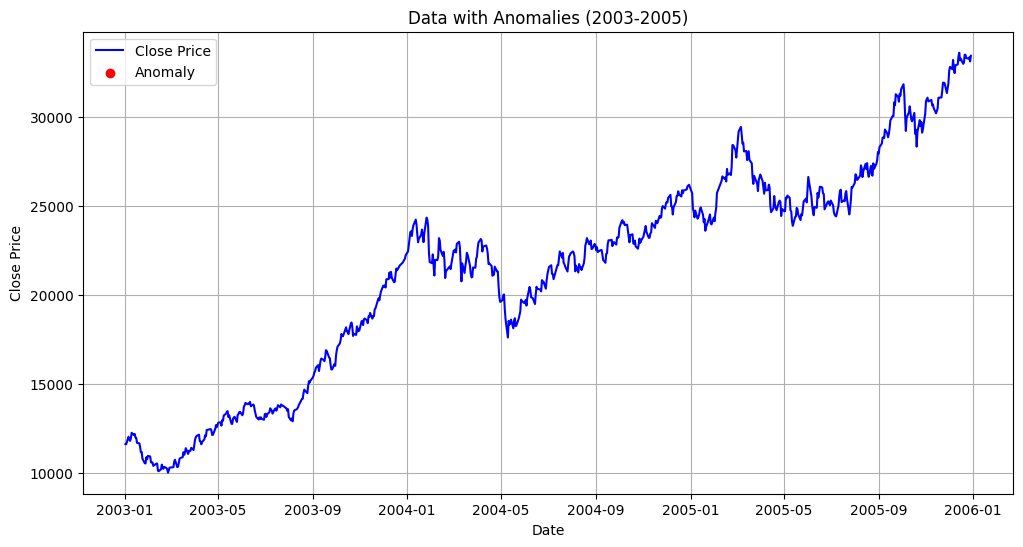

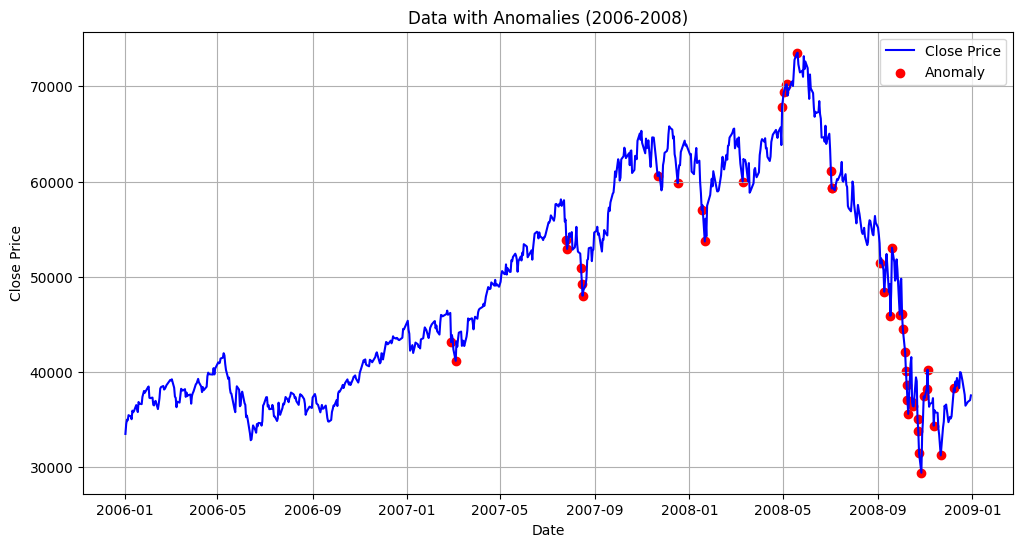

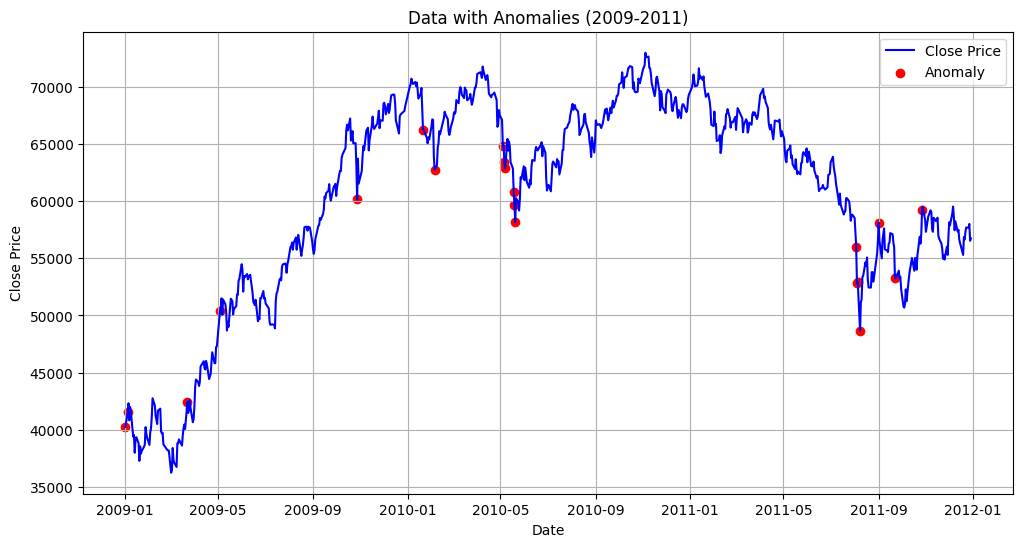

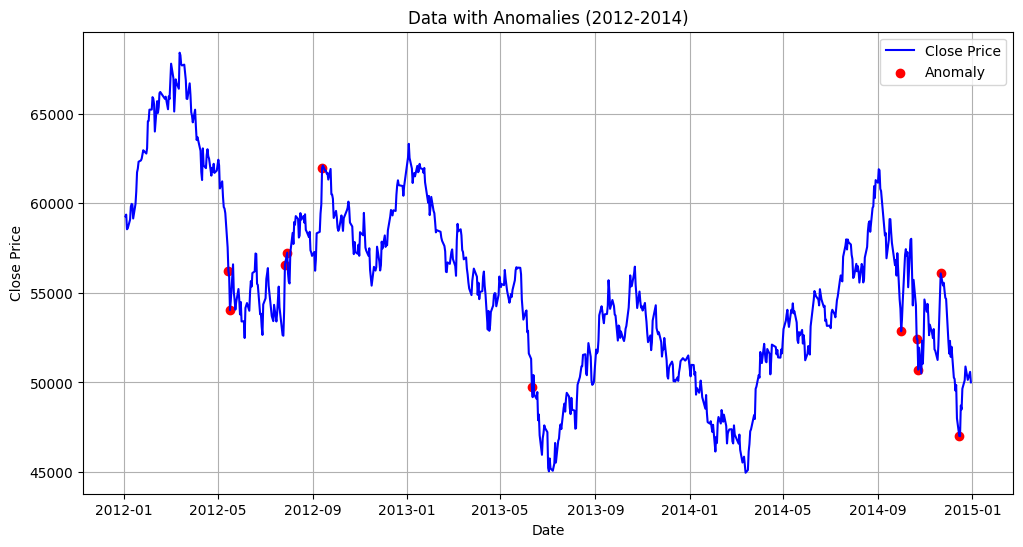

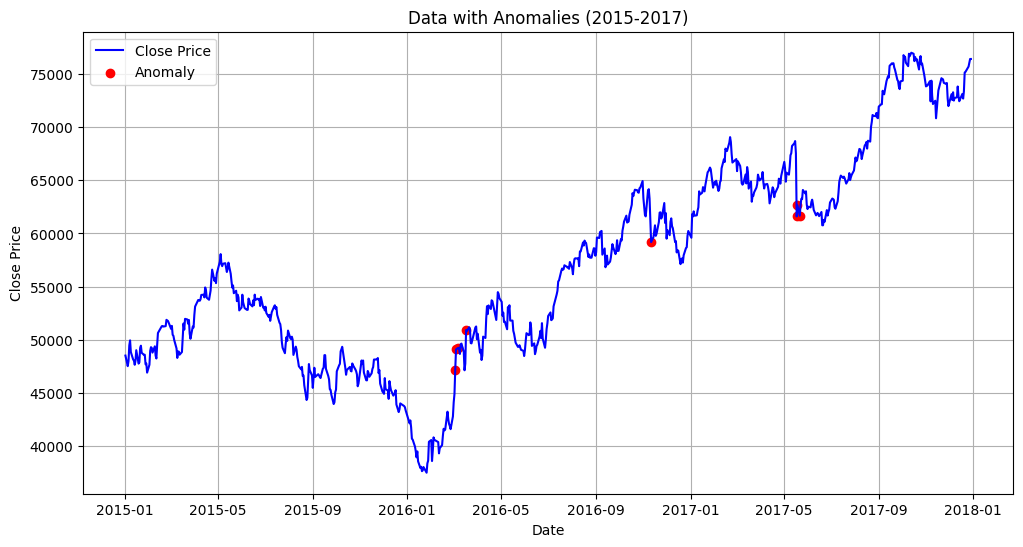

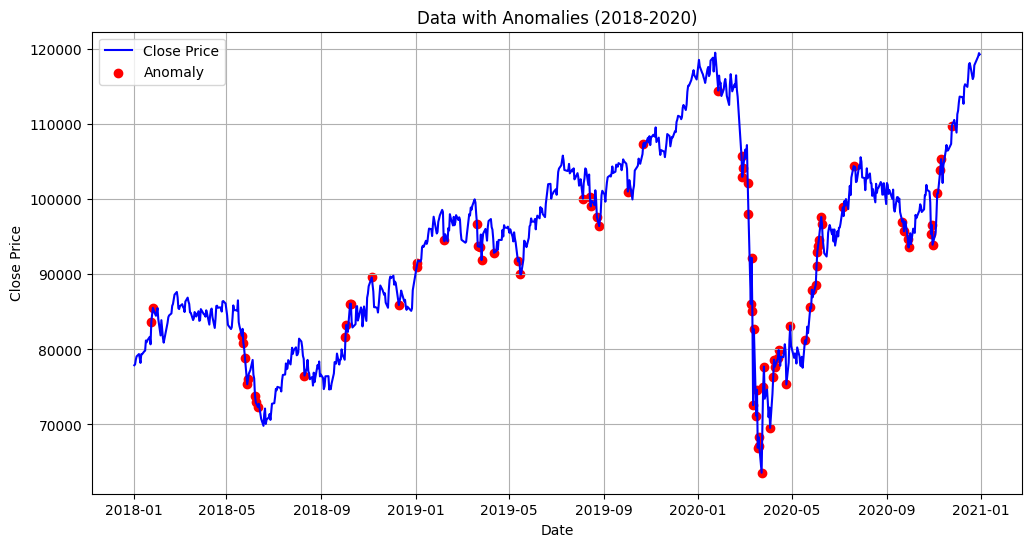

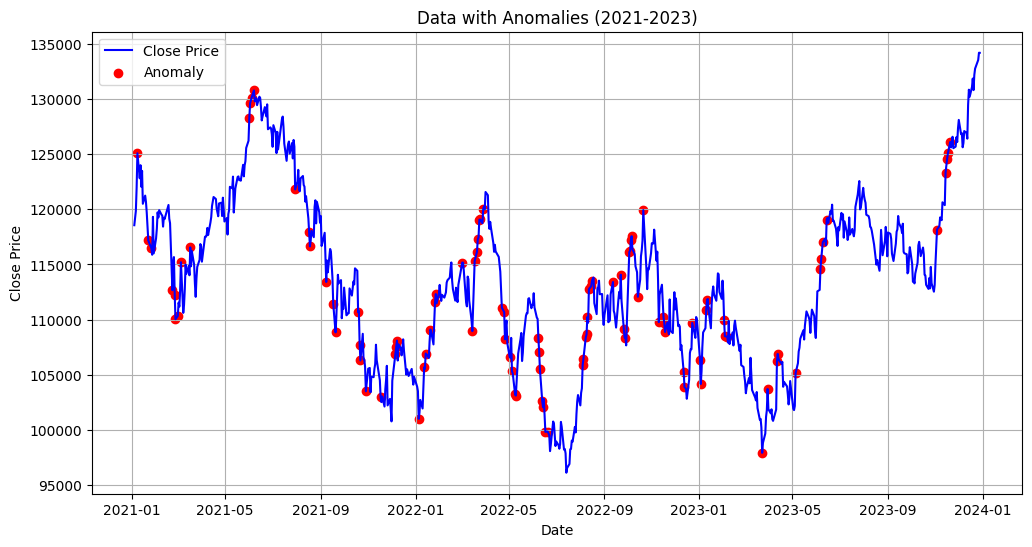

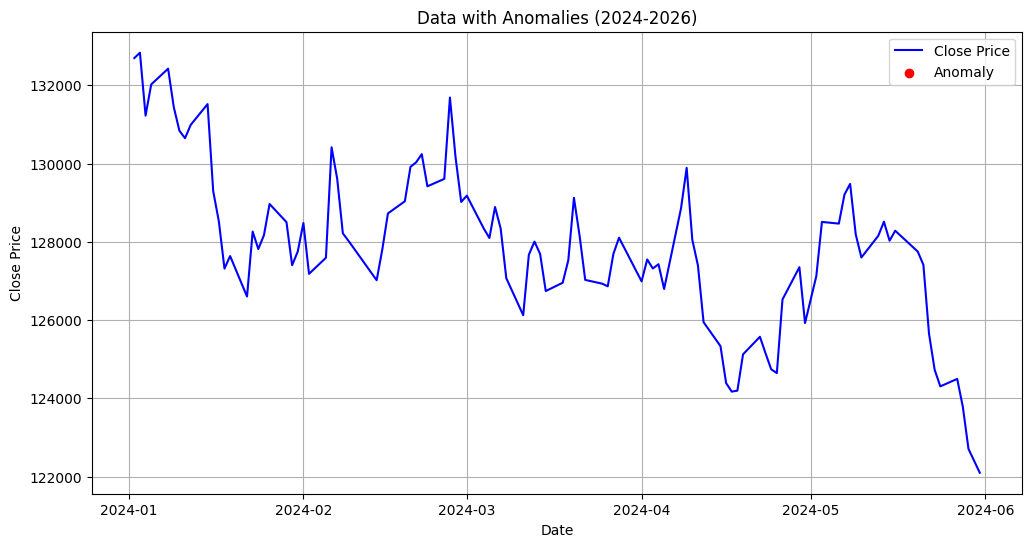

In [8]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, 3)

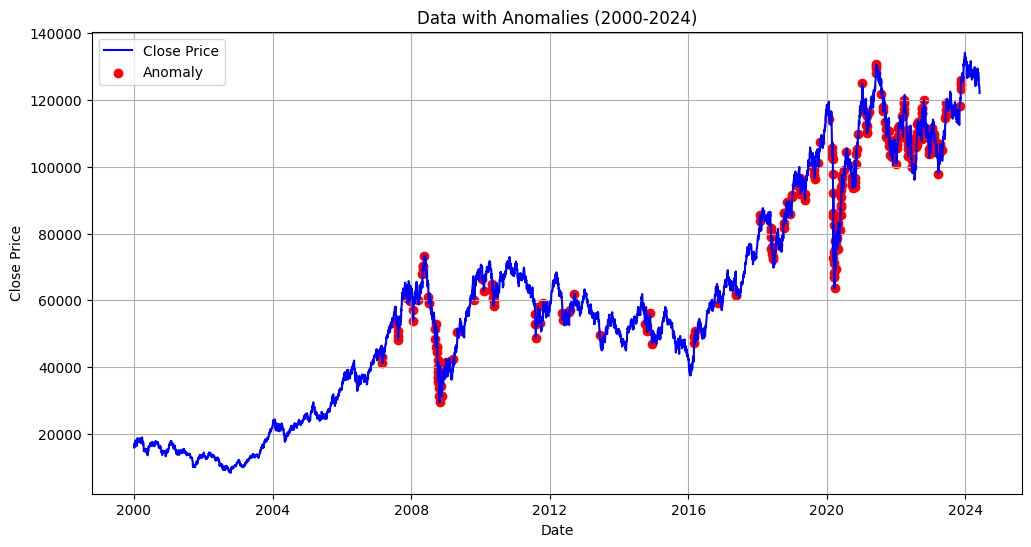

In [9]:
IBOV_all = plot_with_anomalies(IBOV, anomalies, 25)